In [ ]:
import math
import random
import string
import csv
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
import numpy as np
X = np.random.randint(1, 12, (3, 4)) 
U, S, V = np.linalg.svd(X, full_matrices=True)
U1, S1, V1 = np.linalg.svd(X, full_matrices=False)

display(X)
S

array([[ 7,  8,  4,  4],
       [10, 11,  6,  4],
       [ 5,  7,  9,  1]])

array([23.41190615,  5.0237414 ,  0.80291521])

Определяем функцию, которая будет считать все показатели:

In [ ]:
def stats_calculator(lst):
    avg = sum(lst) / len(lst)
    median = sorted(lst)[int(len(lst) / 2)]
    middle = lst[int(len(lst) / 2)]

    probabilities = {x: lst.count(x) / len(lst) for x in set(lst)}
    mode = max(probabilities, key=probabilities.get)

    standart_deviation = math.sqrt(sum((avg - x) ** 2 for x in lst) / len(lst))
    mean_absolute_deviation = sum(abs(avg - x) for x in lst) / len(lst)
    semi_range = max(lst) - min(lst)

    information_value = {val: -math.log(probabilities[val], 2) for val in probabilities}
    entropy = sum(probabilities[val] * information_value[val] for val in probabilities)

    gini_coef = sum(x * (1 - x) for x in probabilities.values())

    index_dict = {'Среднее': avg, 
                  'Медиана': median, 
                  'Середина': middle, 
                  'Мода': mode, 
                  'Стандартное отклонение': standart_deviation,
                  'Абсолютное отклонение': mean_absolute_deviation,
                  'Полуразмах': semi_range,
                  'Энтропия': entropy,
                  'Индекс Джини': gini_coef}

    return index_dict, information_value

Определяем показатели для первой задачи:

In [ ]:
def dummy_lst():
    first_list = [2]*20 + [3]*45 + [4]*25 + [5]*10
    random.shuffle(first_list)
    return first_list


result, information_value = stats_calculator(dummy_lst())
display_df = pd.DataFrame(result, index=['Первое наблюдение'])

display(display_df)

print('Количество информации (для каждой оценки):\n', information_value)

,Среднее,Медиана,Середина,Мода,Стандартное отклонение,Абсолютное отклонение,Полуразмах,Энтропия,Индекс Джини
Первое наблюдение,3.25,3,2,3,0.887412,0.725,3,1.81498,0.685


Количество информации (для каждой оценки):
 {2: 2.321928094887362, 3: 1.15200309344505, 4: 2.0, 5: 3.321928094887362}


Создаём csv-файл:

In [ ]:
def generate_csv(length):

    names = [''.join(random.choices(string.ascii_letters, k=random.randint(4, 20))) for x in range(length)]
    marks = [random.randint(0, 100) for x in range(length)]
    table = list(zip(names, marks))

    with open('students.csv', mode='w', encoding='utf-8', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(table)


generate_csv(100)

Читаем csv-файл:

In [ ]:
def csv_reader():
    with open('students.csv', mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        table = {x[0]: int(x[1]) for x in reader}
    return table


students = csv_reader()

Сортируем студентов, считаем показатели:

In [ ]:
sorted_students = sorted(students.items(), key=lambda x: x[1])
sorted_marks = [x[1] for x in sorted_students]

res1, inf_val1 = stats_calculator(sorted_marks)
res1 = pd.Series(res1, name='Оригинальные данные')
display_df = display_df.append(res1)

Рисуем гистограмму, считаем показатели:

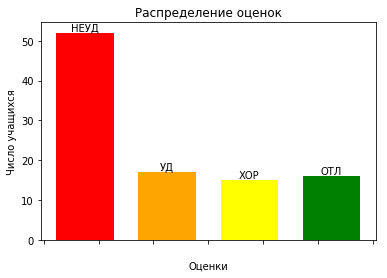

In [ ]:
def bin_sorter(val):
    if val < 50:
        return 1
    elif val < 70:
        return 2
    elif val < 85:
        return 3
    else:
        return 4


def build_hist():

    bins = list(map(bin_sorter, sorted_marks))
    bins_count = {x: bins.count(x) for x in set(bins)}

    return bins, list(bins_count.values())


def draw_hist(bins):
    fig, ax = plt.subplots(1, 1)
    ax.hist(bins, bins=4, rwidth=0.7)
    ax.set_title("Распределение оценок")
      
    ax.set_xlabel('Оценки')
    ax.set_ylabel('Число учащихся')
    plt.xticks(color='w')
      
    rects = ax.patches
    labels = ['НЕУД', 'УД', 'ХОР', 'ОТЛ']
    colours = ['red', 'orange', 'yellow', 'green']

    for rect, label, colour in zip(rects, labels, colours):
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
                ha='center', va='bottom')
      rect.set_facecolor(colour)
      
    plt.show()


bins, hist_data = build_hist()
res2, inf_val2 = stats_calculator(hist_data)
res2 = pd.Series(res2, name='Гистограмма')
display_df = display_df.append(res2)

draw_hist(bins)

Итоговая таблица по трём наблюдениям:

In [ ]:
display(display_df)

,Среднее,Медиана,Середина,Мода,Стандартное отклонение,Абсолютное отклонение,Полуразмах,Энтропия,Индекс Джини
Первое наблюдение,3.25,3.0,2.0,3.0,0.887412,0.7250,3.0,1.814980,0.6850
Оригинальные данные,48.73,46.0,46.0,8.0,29.981613,26.5046,98.0,5.923465,0.9818
Гистограмма,25.00,17.0,15.0,16.0,15.604487,13.5000,37.0,2.000000,0.7500
